In [41]:
import molsysmt as msm
import pandas as pd
import numpy as np
import os
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

In [12]:
mol_system = msm.convert("./data/1bmk.pdb", "molsysmt.MolSys")
mol_system = msm.remove_solvent(mol_system, water=True, ions=True)
msm.info(mol_system, target="component")

index,n atoms,n groups,chain index,molecule index,molecule type,entity index,entity name
0,2833,351,0,0,protein,0,Protein_0
1,23,1,1,1,small molecule,1,SB5


In [25]:
# Print cordinates 
coordinates = msm.get(mol_system, selection='molecule_index==1', target="atom", coordinates=True)
coords = np.array(coordinates)
df = pd.DataFrame({'X': coords[0,:,0], 'Y': coordinates[0,:,1], 'Z': coords[0,:,2]})
df

/Users/danielibarrola/miniconda3/envs/openpharmacophore/lib/python3.7/site-packages/ipykernel_launcher.py:2: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  
/Users/danielibarrola/miniconda3/envs/openpharmacophore/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1302: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  v = np.array(v, copy=False)
/Users/danielibarrola/miniconda3/envs/openpharmacophore/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1672: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  subarr = np.array(values, dtype=dtype, copy=copy)


,X,Y,Z
0,0.7973,1.0854,3.0287
1,0.6115,1.2249,3.0931
2,0.6756,1.1394,2.9995
3,0.6139,1.1100,2.8755
4,0.4885,1.1662,2.8450
5,0.4211,1.2533,2.9376
6,0.4853,1.2814,3.0623
7,0.1349,0.8914,3.0280
8,0.0424,0.8416,2.9422
9,-0.0061,0.9220,2.8487


In [7]:
mol_system_2 = msm.convert("./data/1bmk_protein.pdb", "molsysmt.MolSys")
msm.info(mol_system_2, target="component")

index,n atoms,n groups,chain index,molecule index,molecule type,entity index,entity name
0,2833,351,0,0,protein,0,Protein_0


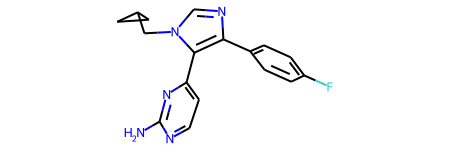

In [32]:
suppl = Chem.SDMolSupplier('./data/1bmk_SB5_ligand.sdf')
molecules = [mol for mol in suppl]
molecules[0]

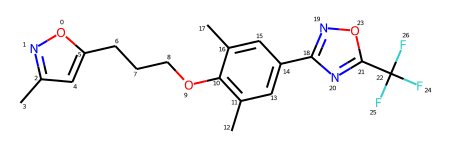

In [45]:
suppl = Chem.SDMolSupplier('./data/1ncr_W11_ligand.sdf')
molecules = [mol for mol in suppl]
mol = molecules[0]
mol.RemoveAllConformers()
mol

In [44]:
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)
feats = factory.GetFeaturesForMol(mol)
for feature in feats:
    print(feature.GetFamily())
    print(feature.GetType())
    print(feature.GetAtomIds())
    print('\n----------------------\n')

Acceptor
SingleAtomAcceptor
(1,)

----------------------

Acceptor
SingleAtomAcceptor
(9,)

----------------------

Acceptor
SingleAtomAcceptor
(19,)

----------------------

Acceptor
SingleAtomAcceptor
(20,)

----------------------

Aromatic
Arom5
(0, 1, 2, 4, 5)

----------------------

Aromatic
Arom5
(18, 19, 23, 21, 20)

----------------------

Aromatic
Arom6
(10, 11, 13, 14, 15, 16)

----------------------

Hydrophobe
ThreeWayAttach
(11,)

----------------------

Hydrophobe
ThreeWayAttach
(14,)

----------------------

Hydrophobe
ThreeWayAttach
(16,)

----------------------

Hydrophobe
ChainTwoWayAttach
(6,)

----------------------

Hydrophobe
ChainTwoWayAttach
(7,)

----------------------

LumpedHydrophobe
RH6_6
(10, 11, 13, 14, 15, 16)

----------------------

